# Product Buyed or Not

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data Exploration

## Summary of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Descriptive Summary of Data

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Check for any Null Values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Check for any Duplicate Values

In [7]:
df.duplicated().sum()

0

## Check for Imbalanced Data

In [8]:
zeros=df[df["Purchased"]==0]
ones=df[df["Purchased"]==1]

In [9]:
len(zeros),len(ones)

(257, 143)

In [10]:
from sklearn.utils import resample

In [11]:
ones_resample=resample(ones,replace=True,n_samples=len(zeros),random_state=42)

In [12]:
ones_resample

,User ID,Gender,Age,EstimatedSalary,Purchased
340,15588080,Female,53,104000,1
320,15774872,Female,52,138000,1
48,15727696,Male,30,135000,1
347,15768151,Female,54,108000,1
283,15663249,Female,52,21000,1
...,...,...,...,...,...
364,15654456,Male,42,104000,1
20,15649487,Male,45,22000,1
331,15589715,Female,48,119000,1
373,15708791,Male,59,130000,1


In [13]:
df=pd.concat([ones_resample,zeros])

In [14]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
340,15588080,Female,53,104000,1
320,15774872,Female,52,138000,1
48,15727696,Male,30,135000,1
347,15768151,Female,54,108000,1
283,15663249,Female,52,21000,1
...,...,...,...,...,...
377,15800215,Female,42,53000,0
380,15683758,Male,42,64000,0
387,15627220,Male,39,71000,0
394,15757632,Female,39,59000,0


In [15]:
zeros=df[df["Purchased"]==0]
ones=df[df["Purchased"]==1]

In [16]:
len(zeros),len(ones)

(257, 257)

In [17]:
df=df.sample(frac=1)

In [18]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
31,15729054,Female,27,137000,1
197,15680243,Female,20,36000,0
32,15573452,Female,21,16000,0
299,15747043,Male,46,117000,1
337,15612465,Male,35,79000,0
...,...,...,...,...,...
397,15654296,Female,50,20000,1
17,15617482,Male,45,26000,1
129,15792102,Female,26,84000,0
245,15722061,Female,51,146000,1


In [19]:
df=df.reset_index()

In [20]:
df.drop("index",axis=1,inplace=True)

In [21]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15729054,Female,27,137000,1
1,15680243,Female,20,36000,0
2,15573452,Female,21,16000,0
3,15747043,Male,46,117000,1
4,15612465,Male,35,79000,0
...,...,...,...,...,...
509,15654296,Female,50,20000,1
510,15617482,Male,45,26000,1
511,15792102,Female,26,84000,0
512,15722061,Female,51,146000,1


# Convert Categorical Columns to Numericals

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder=LabelEncoder()

In [24]:
df["Sex"]=encoder.fit_transform(df[["Gender"]])

In [25]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Sex
0,15729054,Female,27,137000,1,0
1,15680243,Female,20,36000,0,0
2,15573452,Female,21,16000,0,0
3,15747043,Male,46,117000,1,1
4,15612465,Male,35,79000,0,1
...,...,...,...,...,...,...
509,15654296,Female,50,20000,1,0
510,15617482,Male,45,26000,1,1
511,15792102,Female,26,84000,0,0
512,15722061,Female,51,146000,1,0


# EDA

## Check for Outliers

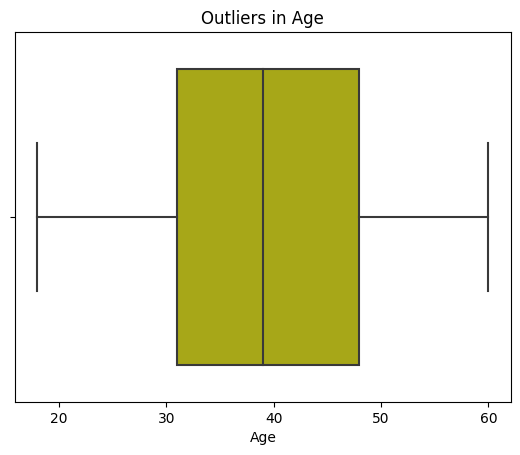

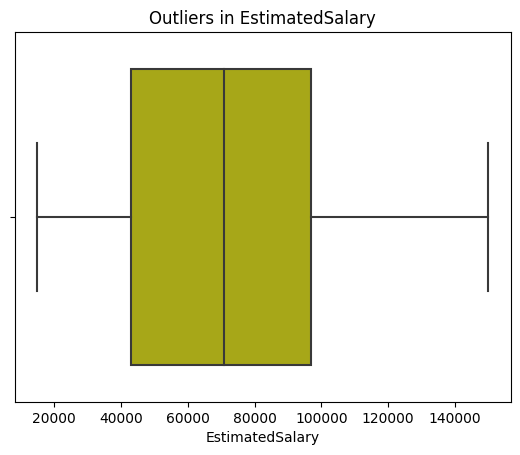

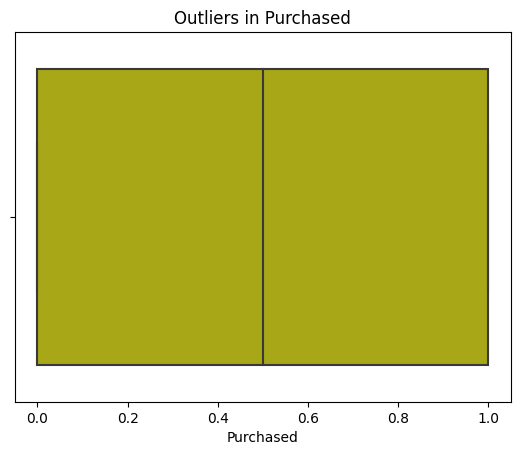

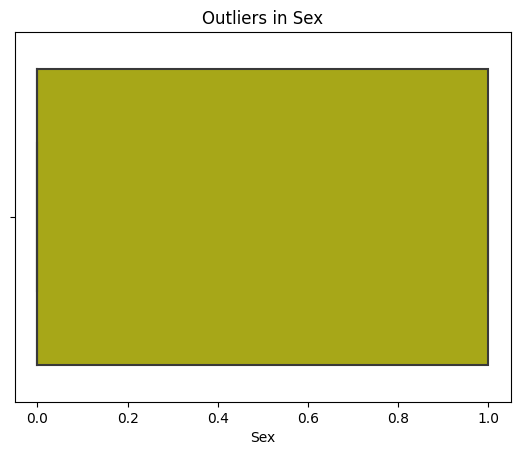

In [26]:
for i in df.columns:
    if i not in ["User ID","Gender"]:
        sns.boxplot(df[i],color="y")
        plt.title("Outliers in "+str(i))
        plt.show()

## Check the Spread of the Data

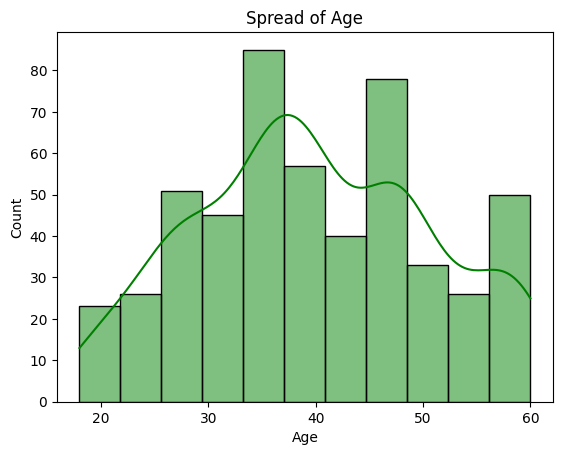

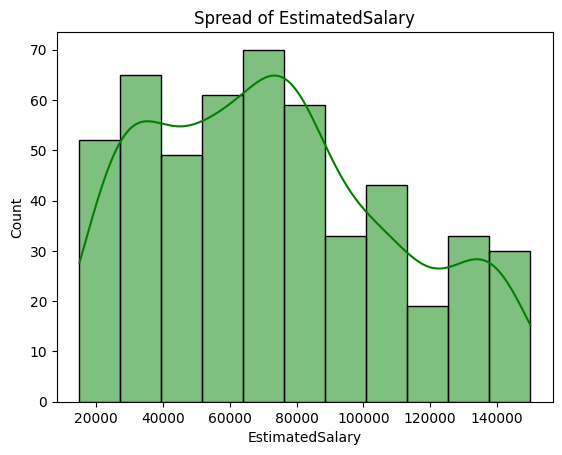

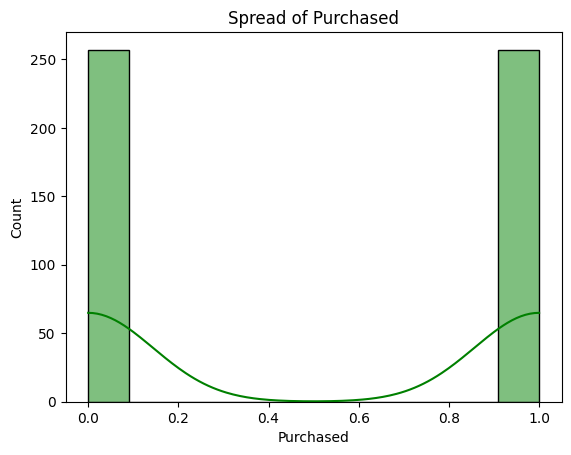

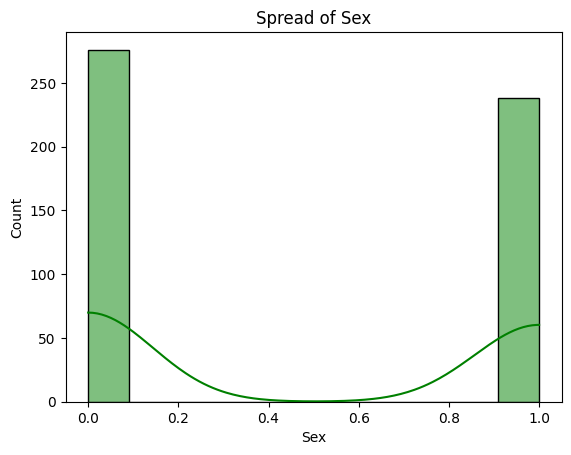

In [27]:
for i in df.columns:
    if i not in ["User ID","Gender"]:
        sns.histplot(df[i],kde=True,color="g")
        plt.title("Spread of "+str(i))
        plt.show()

## Releationship between Age and Estimated salary W.R.T Gender

Text(0.5, 1.0, 'Age vs Salary')

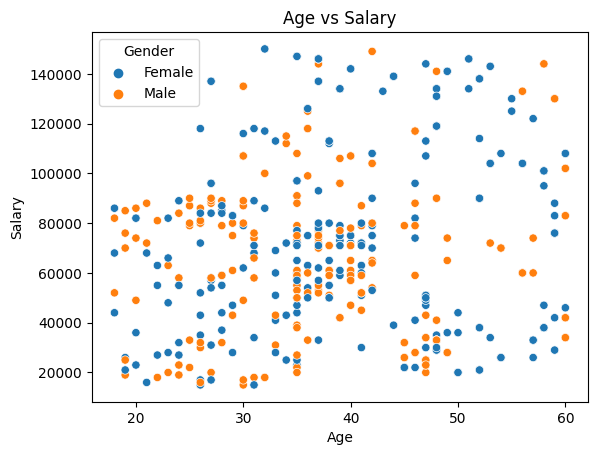

In [28]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Gender"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")

## Releationship between Age and Estimated salary W.R.T Gender

Text(0.5, 1.0, 'Age vs Salary')

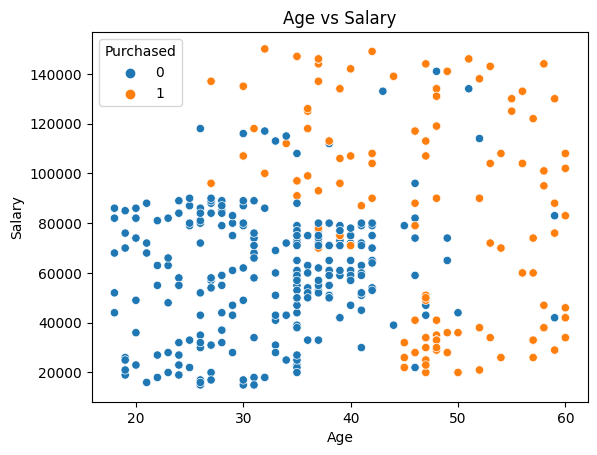

In [29]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")

### Observations:
- If Age is more or If salary is more, then Purchasing power Presents

# Feature Engineering

## Check Co Releations and drop unnecessary columns

<Axes: >

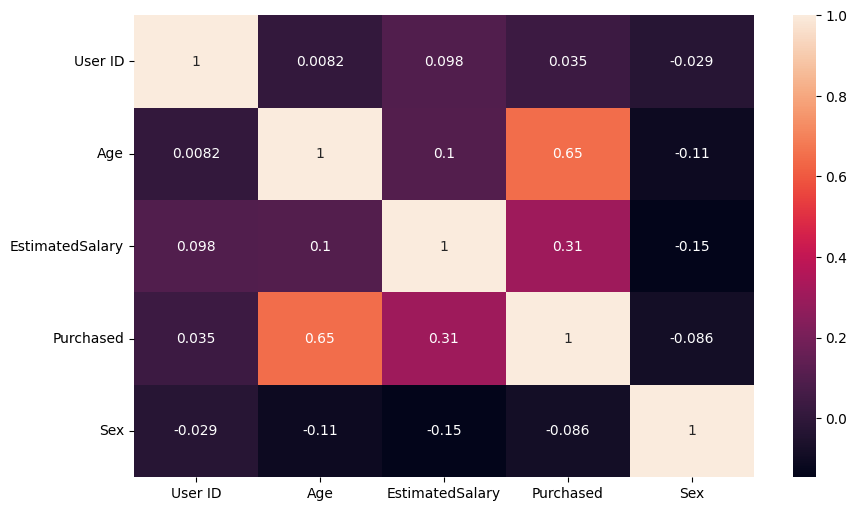

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method="spearman"),annot=True)

### Observations:
- Sex and User ID doesn't impact Purchasing, so we can remove them.

In [31]:
df.drop(["Gender","Sex","User ID"],axis=1,inplace=True)

In [32]:
df

,Age,EstimatedSalary,Purchased
0,27,137000,1
1,20,36000,0
2,21,16000,0
3,46,117000,1
4,35,79000,0
...,...,...,...
509,50,20000,1
510,45,26000,1
511,26,84000,0
512,51,146000,1


# Split Data between Independent and Dependent Features

## X Data

In [33]:
x=df.drop("Purchased",axis=1)

In [34]:
x.head()

,Age,EstimatedSalary
0,27,137000
1,20,36000
2,21,16000
3,46,117000
4,35,79000


## Scale X Data

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [37]:
x_new=scaler.fit_transform(x)

In [38]:
x_new

array([[0.21428571, 0.9037037 ],
       [0.04761905, 0.15555556],
       [0.07142857, 0.00740741],
       ...,
       [0.19047619, 0.51111111],
       [0.78571429, 0.97037037],
       [0.28571429, 0.01481481]])

In [39]:
x=pd.DataFrame(x_new,columns=x.columns)

In [40]:
x

,Age,EstimatedSalary
0,0.214286,0.903704
1,0.047619,0.155556
2,0.071429,0.007407
3,0.666667,0.755556
4,0.404762,0.474074
...,...,...
509,0.761905,0.037037
510,0.642857,0.081481
511,0.190476,0.511111
512,0.785714,0.970370


## Save scaler to use it in Flask web API

In [41]:
import pickle
pickle.dump(scaler,open("scaler_purchase.pkl","wb"))

## Y Data

In [42]:
y=df["Purchased"]

In [43]:
y

0      1
1      0
2      0
3      1
4      0
      ..
509    1
510    1
511    0
512    1
513    0
Name: Purchased, Length: 514, dtype: int64

# Split the Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [46]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((385, 2), (385,), (129, 2), (129,))

# Build the Model

In [47]:
from sklearn.svm import SVC

In [48]:
model=SVC()

In [49]:
model.fit(x_train,y_train)

SVC()

In [50]:
y_pred=model.predict(x_test)

In [51]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Accuracy Metrics

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

Text(50.722222222222214, 0.5, 'Predicted')

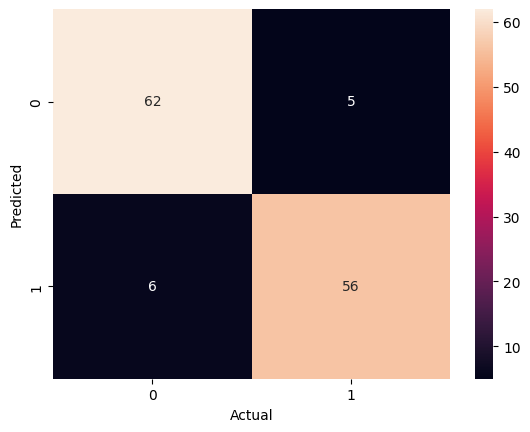

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.92      0.90      0.91        62

    accuracy                           0.91       129
   macro avg       0.91      0.91      0.91       129
weighted avg       0.91      0.91      0.91       129



# Hyperparameter Tuning

In [55]:
grid={
    "degree":[3,6,9,12],
    "gamma":("scale","auto"),
    "shrinking":[True,False],
    "probability":[True,False],
    "random_state":[1,5,10,15,25],
    "coef0":[0.0,1.2,3.4,5.6,77.3]
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
model=SVC()

In [58]:
clf=GridSearchCV(model,param_grid=grid,cv=6)

In [59]:
clf.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'coef0': [0.0, 1.2, 3.4, 5.6, 77.3],
                         'degree': [3, 6, 9, 12], 'gamma': ('scale', 'auto'),
                         'probability': [True, False],
                         'random_state': [1, 5, 10, 15, 25],
                         'shrinking': [True, False]})

In [60]:
clf.best_params_

{'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'probability': True,
 'random_state': 1,
 'shrinking': True}

In [61]:
model=SVC(degree=3,gamma="scale",probability=True,shrinking=True,random_state=1,coef0=0.0)

In [62]:
model.fit(x_train,y_train)

SVC(probability=True, random_state=1)

In [63]:
y_pred=model.predict(x_test)

In [64]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Accuracy Metrics

Text(50.722222222222214, 0.5, 'Predicted')

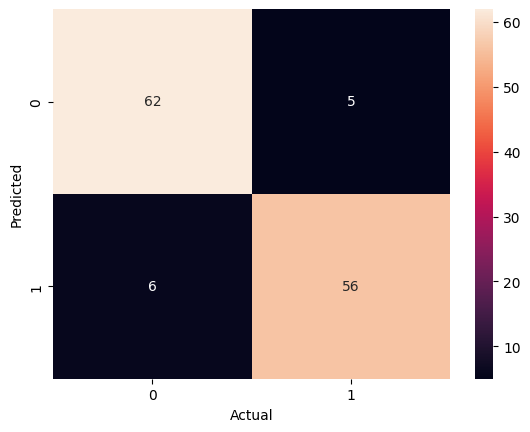

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.92      0.90      0.91        62

    accuracy                           0.91       129
   macro avg       0.91      0.91      0.91       129
weighted avg       0.91      0.91      0.91       129



### Observation:
- Our Default Parameters were the Best Parameters

# Save our Model

In [67]:
pickle.dump(model,open("model_purchase.pkl","wb"))